In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style="white")
sns.set_context("talk")
sns.set_palette("deep")

In [2]:
IDNET_PATH = Path(r"C:\Users\Fred\Documents\Insight\Gait Datasets\IDNet Database\IDNet_dataset")

In [3]:
def get_walk_data(user_id, walk_num):
    # Retrieve folder
    walkid = f"u{str(user_id).zfill(3)}_w{str(walk_num).zfill(3)}"
    folder = IDNET_PATH / walkid
    # For each sensor log, construct df from file
    dfs = []
    for log in folder.glob("*.log"):
        logtype = log.stem.split("_")[-1]  # accelerometer, gyroscope, etc.
        if logtype == "magnetometer":
            continue  # Skip magnetometer since not probably not useful
        df = pd.read_csv(log, sep="\t")
        # Read timestamp column as pandas Timedelta, starting from 0 ns
        df[f"{logtype}_timestamp"] = pd.to_timedelta(df[f"{logtype}_timestamp"], unit="ns")
        df = df.rename(columns={f"{logtype}_timestamp": "timestamp"})
        df = df.set_index("timestamp")
        dfs.append(df)
    merged_df = pd.concat(dfs, axis="columns")
    # Sensors have different sampling freqs so resample in 10ms
    merged_df = merged_df.resample("10ms").mean()
    merged_df = merged_df.loc[~merged_df.isna().any(axis="columns"), :].copy()
    # Convert timestamp to relative times
    merged_df = merged_df.set_index(merged_df.index - merged_df.index[0])
    # Return data, but truncate NaN values at beginning/end (since sensors start/end at slightly different times)
    # TODO: account for time skips within data - see pd.Series(df.index).diff().plot()
    return merged_df

In [4]:
df = get_walk_data(3,1)
df.head()

,accelerometer_x_data,accelerometer_y_data,accelerometer_z_data,gravity_x_data,gravity_y_data,gravity_z_data,gyroscope_x_data,gyroscope_y_data,gyroscope_z_data,linearaccelerometer_x_data,linearaccelerometer_y_data,linearaccelerometer_z_data,rotvec_x_data,rotvec_y_data,rotvec_z_data
timestamp,,,,,,,,,,,,,,,
00:00:00,3.133591,-10.271149,-3.732285,-2.934414,-8.755225,-3.302367,-1.928650,1.875824,0.012680,6.262481,-1.329745,-0.919267,-0.800131,0.167821,0.067023
00:00:00.010000,1.910202,-13.162262,-3.549561,-2.707486,-8.765156,-3.465009,-2.306763,-0.237740,-0.171165,5.187245,-3.338082,-0.685549,-0.814303,0.115225,0.089990
00:00:00.020000,1.531586,-15.235931,-2.400101,-2.427261,-8.787542,-3.612745,-2.319595,0.760407,-0.468658,3.862940,-6.273007,0.146345,-0.825366,0.052710,0.114768
00:00:00.030000,2.001114,-15.914520,-1.588715,-2.033801,-8.859905,-3.676450,-1.724208,1.517868,-0.860830,3.770626,-7.655365,1.619642,-0.828916,-0.006793,0.129548
00:00:00.040000,2.186173,-16.135254,-1.875549,-1.659561,-8.940021,-3.673183,-0.939026,2.039535,-1.064865,3.762083,-7.743752,1.442444,-0.827862,-0.043878,0.131023


In [14]:
def plot_log(df, logtype):
    f, ax = plt.subplots(figsize=(15, 5))
    df = df[[f"{logtype}_x_data",f"{logtype}_y_data",f"{logtype}_z_data"]].copy()
    df["mag"] = np.linalg.norm(df.values, axis=1)
    df.plot.line(y=[f"{logtype}_x_data",f"{logtype}_y_data",f"{logtype}_z_data", "mag"], ax=ax)
    ax.set_ylabel(f"{logtype}")
    ax.set_xlabel("Time")
    ax.legend(["x", "y", "z", "mag"], loc="best")
    sns.despine()

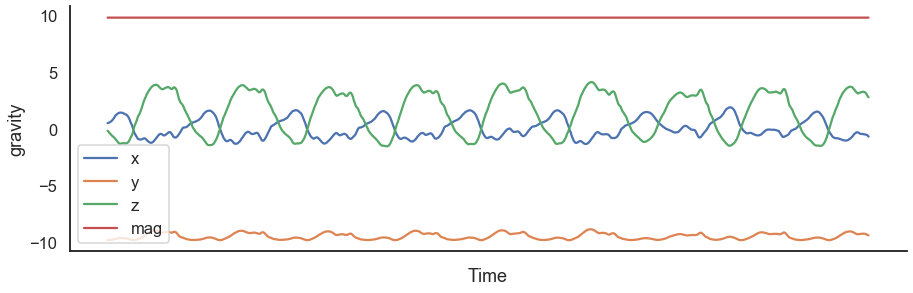

In [15]:
plot_log(df.iloc[2000:3000], "gravity")

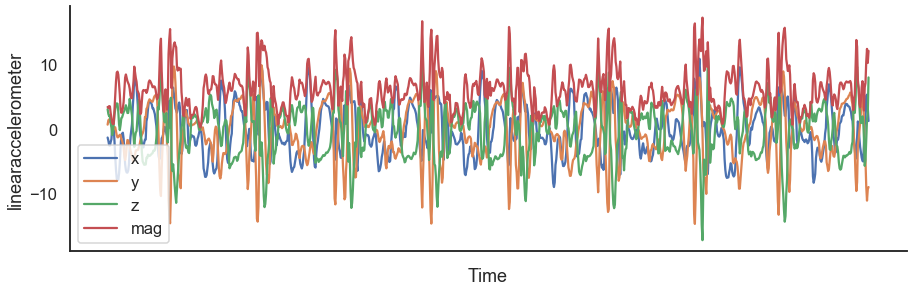

In [16]:
plot_log(df.iloc[2000:3000], "linearaccelerometer")